In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS, LSTM
from synthetictime.simple_time_series import SimpleTimeSeries
from neuralforecast.losses.pytorch import MQLoss

# First we set a random seed
np.random.seed(7)

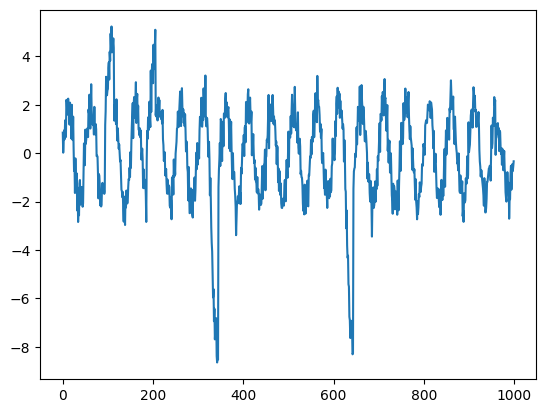

In [2]:
# Now we initiate a simple time series object with the desired parameters
# This also automatically generates the time series
example_series = SimpleTimeSeries(
    size=1000,
    base_amplitude=2.0,
    base_frequency=0.02,
    base_noise_scale=1,
    base_noise_amplitude=0.5,
    number_of_cosine_events=5,
    cosine_frequency_low=0.01,
    cosine_frequency_high=0.01,
    cosine_amplitude_low=2.0,
    cosine_amplitude_high=8,
)
synthetic_timeseries = example_series.synthetic_time_series
plt.plot(synthetic_timeseries)
plt.show()

In [3]:
# transform the synthetic time series into a pandas dataframe
synthetic_timeseries = pd.DataFrame(
    {
        "unique_id": 1.0,
        "ds": np.arange(len(synthetic_timeseries)),
        "y": synthetic_timeseries,
    }
)

In [4]:
horizon = 86
Y_train = synthetic_timeseries[:-horizon]
Y_test = synthetic_timeseries[-horizon:]
horizon = len(Y_test)

In [5]:
levels = [80, 90]
models = [
    LSTM(input_size=3 * horizon, h=horizon, loss=MQLoss(level=levels), max_steps=1000)
]
nf = NeuralForecast(
    models=models,
    freq=1,
)
nf.fit(df=Y_train)

/home/yfunk/anaconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MQLoss     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/yfunk/anaconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/home/yfunk/anaconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/home/yfunk/anaconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.


In [6]:
predictions = nf.predict()

/home/yfunk/anaconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/yfunk/anaconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/yfunk/anaconda3/envs/XUQ-TimeSeriesForecast/lib/python3.10/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [7]:
predictions.head()

,ds,LSTM-median,LSTM-lo-90,LSTM-lo-80,LSTM-hi-80,LSTM-hi-90
unique_id,,,,,,
1.0,914,1.929206,1.184723,1.439014,2.693721,3.113336
1.0,915,1.877711,1.154423,1.321995,2.635647,2.969518
1.0,916,1.772162,0.937012,1.241012,2.438330,2.739218
1.0,917,1.621092,0.841383,0.964633,2.333609,2.519726
1.0,918,1.454090,0.675197,0.894367,2.140914,2.357043


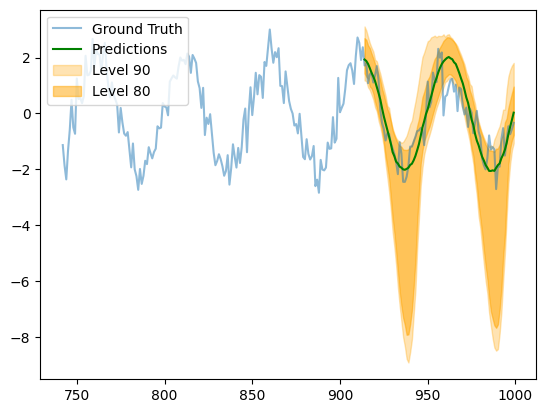

In [10]:
last = horizon * 3
plt.plot(
    synthetic_timeseries.ds.iloc[-last:],
    synthetic_timeseries.y.iloc[-last:],
    label="Ground Truth",
    alpha=0.5,
)
plt.plot(
    predictions.ds.iloc[-last:],
    predictions["LSTM-median"].iloc[-last:],
    label="Predictions",
    color="green",
)

plt.fill_between(
    predictions.ds.iloc[-last:],
    predictions["LSTM-lo-90"].iloc[-last:],
    predictions["LSTM-hi-90"].iloc[-last:],
    alpha=0.3,
    color="orange",
    label="Level 90",
)
plt.fill_between(
    predictions.ds.iloc[-last:],
    predictions["LSTM-lo-80"].iloc[-last:],
    predictions["LSTM-hi-80"].iloc[-last:],
    alpha=0.5,
    color="orange",
    label="Level 80",
)

plt.legend(loc="upper left")
plt.show()